In [1]:
# dataloader

import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

In [13]:
# set arguments
# !pip install easydict
from easydict import EasyDict

args = EasyDict({
    'dataset_name': 'cifar10',
    'data_root': '../data/',
    'resolution': 32
})

In [14]:
# define transform
data_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(args.resolution),
    transforms.CenterCrop(args.resolution)
])

In [16]:
# Load image dataset
# dataset_name = 'cifar10'
# data_root = '../data/'

dataset_classes = [ds for ds in dir(torchvision.datasets) 
                   if ds.lower() == args.dataset_name.lower()]
assert dataset_classes, f'Dataset name {args.dataset_name} does not exist'
dataset_class = getattr(torchvision.datasets, dataset_classes[0])

train_dataset = dataset_class(root=args.data_root, train=True, download=True, transform=data_transforms)
test_dataset = dataset_class(root=args.data_root, train=False, download=True, transform=data_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
# define sampler
def get_sampler(dataset, classes=[0]):
    if isinstance(classes, int): classes = [classes]
    targets = torch.tensor(dataset.targets)
    mask = torch.zeros_like(targets)
    for c in classes:
        mask += targets==c
    target_idx = mask.nonzero()
    
    sampler = torch.utils.data.sampler.SubsetRandomSampler(target_idx)
    
    return sampler

In [38]:
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=4,
    sampler=get_sampler(train_dataset, [0, 1]),
    drop_last=True,
)
test_dataloader = DataLoader(
    test_dataset, 
    batch_size=4,
    sampler=get_sampler(test_dataset, [0, 1]),
    drop_last=True,
)

In [34]:
def plot_images(imgs):
    import matplotlib.pyplot as plt
    imgs = torchvision.utils.make_grid(imgs)
    plt.imshow(imgs.permute(1, 2, 0))

tensor([1, 0, 0, 1])


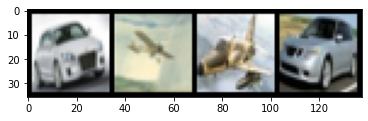

In [36]:
imgs, labels = next(iter(train_dataloader))
print(labels)
plot_images(imgs)